In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import scipy as sp

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
N = 100
mean = 0
std = 1

x = np.random.randn(N) * std + mean

In [3]:
bin_width = 2 * sp.stats.iqr(x) / np.pow(N, 1/3)
n_bins = (np.max(x) - np.min(x)) // bin_width
n_bins

np.float64(9.0)

In [4]:
def error_bar_maker(x: np.ndarray, n_bins: int):

  bins = np.linspace(np.min(x), np.max(x), n_bins)

  errors = []
  positions = []
  events = []
  for i in range(n_bins - 1):
    n = x[np.logical_and(x >= bins[i], x < bins[i+1])].shape[0]
    if i == n_bins-2:
      n+=1

    if n == 0:
      err = 0
    else:
      err = np.sqrt(n)
    
    errors.append(err)
    positions.append((bins[i+1] - bins[i])/2 + bins[i])
    events.append(n)
  
  return np.array(positions), np.array(events), np.array(errors)

In [5]:
def generating_gaussians(x: np.ndarray):
  gaussians = [sp.stats.norm(loc=xi, scale=(1.06 * x.std() * np.pow(x.shape[0], -1/5))) for xi in x]
  return gaussians

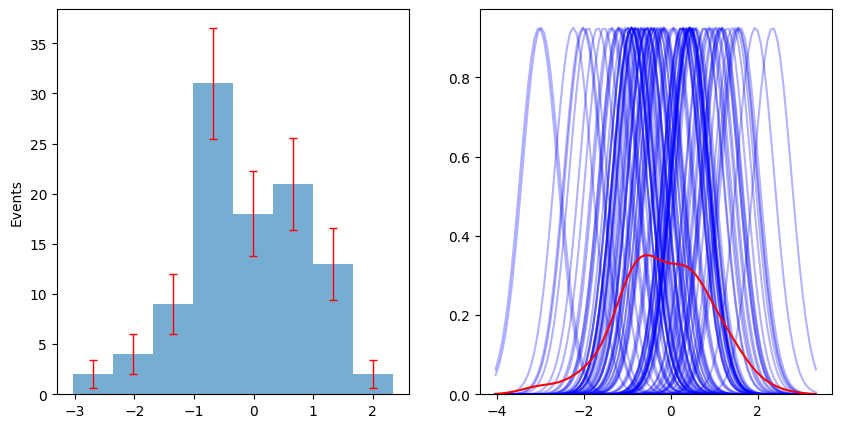

In [6]:
positions, events, errors = error_bar_maker(x, int(n_bins))

gaussians = generating_gaussians(x)


fig, axs = plt.subplots(ncols=2, figsize=(10,5))

axs[0].hist(x, bins=np.linspace(np.min(x), np.max(x), int(n_bins)), 
        histtype='bar', alpha=0.6)
axs[0].errorbar(positions, events, yerr=errors, 
            fmt='none', color='r', elinewidth=1, capsize=3)

axs[0].set_ylabel("Events")
axs[0].set_ylim(0,)

axs[0].yaxis.set_major_locator(MultipleLocator(N//(2 * n_bins)))


l = np.linspace(np.min(x) - std, np.max(x) + std, 100)

g_sum = 0

for g in gaussians:
  axs[1].plot(l, g.pdf(l), color='b', alpha=0.3)
  g_sum += g.pdf(l)

g_sum /= N

axs[1].plot(l, g_sum, color='r')

axs[1].set_ylim(0,)

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

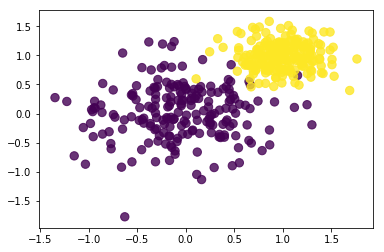

In [7]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [ ]:
def dataset_generator(n: int, means: np.ndarray, stds: np.ndarray):
  try:
    assert means.shape == stds.shape
  except:
    print("means and stds have different shape")
    return 
  
  dataset = np.array([[], [], []]).reshape(-1, 3)
  for i in range(means.shape[0]):
    temp = np.hstack(((np.random.randn(n) * stds[i, 0] + means[i, 0]).reshape(-1, 1),
                      (np.random.randn(n) * stds[i, 1] + means[i, 1]).reshape(-1, 1),
                       np.array([i]*n).reshape(-1, 1)))
    dataset = np.vstack((dataset, temp))

  return dataset

In [28]:
means = np.array([[1, 2], [-1, 1]]).reshape(-1, 2)
stds = np.array([[0.5, 0.2], [0.1, 0.4]]).reshape(-1, 2)

dataset = dataset_generator(100, means, stds)

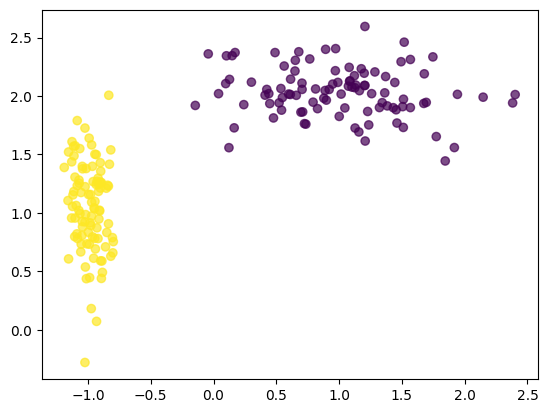

In [29]:
fig, ax = plt.subplots()

ax.scatter(dataset[:, 0], dataset[:,1], c=dataset[:,2], alpha=0.7)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot